# V.1 Exploring the green reds

### a) & b) Scatterplot matrix and hight quality variables

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
path = './resources/winequality-red.csv'
data_wine = pd.read_csv(path, sep= ';')

In [43]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot = False):
    #take the columns and number of rows
    rows, columns = wine_data.shape
    #plot the image , it trows an array of axes , and the figure
    fig, axes = plt.subplots(nrows = columns, ncols= columns, figsize = (20,20))
    #adjust the space bettwen subplots to 0
    fig.subplots_adjust(hspace = 0, wspace = 0)
    #take out the number from the axis
    for ax in axes.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    #name of the columns
    feature_names = wine_data.columns;
    #put the name in the correct spaces (middle)
    for i, label in enumerate(feature_names):
        axes[i, i].annotate(label, (0.5,0.5), xycoords='axes fraction', ha = 'center', va = 'center')
    #separate the data depending on the quality
    good_wines = wine_data[(wine_data['quality'] > good_threshold)]
    bad_wines = wine_data[(wine_data['quality']) < bad_threshold]
    #plot the data in the subplots, red for bad green for good
    for i in range(columns):
        for j in range(i + 1, columns):
            axes[i, j].scatter(good_wines.iloc[:, j], good_wines.iloc[:, i], c=['g'], marker='.')
            axes[i, j].scatter(bad_wines.iloc[:, j], bad_wines.iloc[:, i], c=['r'], marker='.')
            axes[j, i].scatter(good_wines.iloc[:, i], good_wines.iloc[:, j], c=['g'], marker='.')
            axes[j, i].scatter(bad_wines.iloc[:, i], bad_wines.iloc[:, j], c=['r'], marker='.')
    #save the plot if the variable is true
    if save_plot:
        plt.savefig('./scatterplot-matrix.png')
    return fig

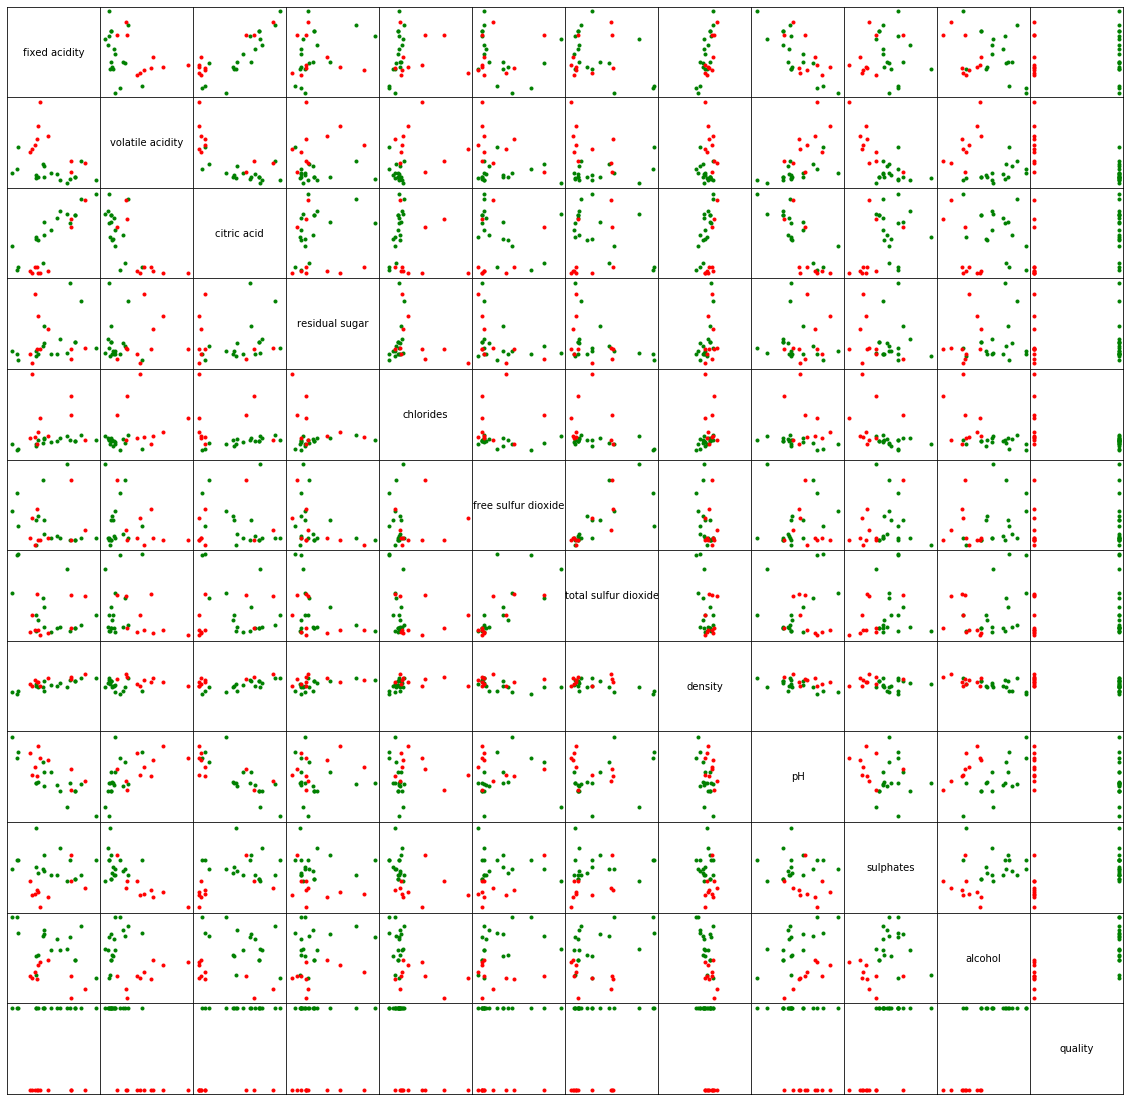

In [44]:
fig = plot_scatter_matrix(data_wine, 7, 4, True)
plt.show(fig)

b) Becouse a perceptron is a linear classifier , data that can be separate in a linear way is better , in this case we can see that pH , alcohol and sulphates are the best ones , and the bad ones are density and chlorides

# V.2 Learning to Perceptron 

In [45]:
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
seed = 99
random.seed(10)
l_rate = 0.1
n_epoch = 14000
bias = 1
thresh_hold = 6

In [47]:
def normalize(array):
    new = []
    hei = max(array)
    low = min(array)
    for index, value in enumerate(array):
        new.append((value - low) / (hei - low))
    return new

In [48]:
path = './resources/winequality-red.csv'
wine_data = pd.read_csv(path, sep=';')
features = ['alcohol', 'pH', 'quality']
selected_wine_data = wine_data[(wine_data['quality'] > 7) | (wine_data['quality'] < 4)][features]
index_se = selected_wine_data.index.get_values()
data_alcohol = normalize(selected_wine_data['alcohol'])
data_ph = normalize(selected_wine_data['pH'])
array_quality = selected_wine_data['quality']

In [49]:
def normalize_quality(array_quali, dataalch, datapH):
    array_val = []
    for index, value in enumerate(array_quali):
        value = 1 if value > thresh_hold else 0 
        array_val.append([dataalch[index] ,datapH[index],value])
    return (array_val)

In [50]:
array_values = normalize_quality(array_quality, data_alcohol, data_ph)

In [51]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [52]:
def train_weights(train, lrate, n_epoch):
    weights = [random.random() for i in range(len(train[0]))]
    list_info = []
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + lrate * error
            for i in range(len(row) - 1):
                weights[i + 1] = weights[i + 1] + lrate * error * row[i]
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lrate, sum_error))
        list_info.append((epoch, lrate, sum_error , weights.copy()))
        if sum_error == 0:
            break
        #lrate *= 0.99
    return list_info

In [53]:
train_info = train_weights(array_values, l_rate, n_epoch)

In [54]:
def select_data(wine_data, train_weights,selected_wine):
    good_wine = []
    bad_wine = []
    #for index, row in enumerate(wine_data):
        #good_wine.append(selected_wine.iloc[index].values) if predict(row[-3:], train_weights) > 0 else bad_wine.append(selected_wine.iloc[index].values)
    for index, row in enumerate(wine_data):
        good_wine.append(row) if predict(row[-3:], train_weights) > 0 else bad_wine.append(row)
    return([good_wine,bad_wine])
def select_data2(wine_dat, train_weights,selected_wine):
    good_wine = []
    bad_wine = []
    for index, row in enumerate(wine_dat):
        good_wine.append(selected_wine.iloc[index].values) if predict(row[-3:], train_weights) > 0 else bad_wine.append(selected_wine.iloc[index].values)
    #for index, row in enumerate(wine_data):
     #   good_wine.append(row) if predict(row[-3:], train_weights) > 0 else bad_wine.append(row)    
    return([good_wine,bad_wine])

In [55]:
def plot_points(list_of_w, train_w ,X1 , X2):
    for array in list_of_w[0]:
        plt.scatter(array[0], array[1], c='r', alpha=0.5)
    for array in list_of_w[1]:
        plt.scatter(array[0], array[1], c='g', alpha=0.5)
    x1 = X1
    y1 = (-train_w[0] / train_w[2]) / (train_w[0] / train_w[1]) * x1 + (-train_w[0] / train_w[2])
    x2 = X2
    y2 = (-train_w[0] / train_w[2]) / (train_w[0] / train_w[1]) * x2 + (-train_w[0] / train_w[2])
    plt.xlabel('Alcohol')
    plt.ylabel('pH')
    plt.plot([x1 , x2],[y1, y2], '-', c= 'black')

In [56]:
def plot_perfomance(perfomance, wine_dat, good_thresh, epoch= -1, save_plot = False):
    selected_w_d = wine_data[(wine_dat['quality'] > good_thresh[0]) | (wine_data['quality'] < good_thresh[1])][features]
    data_al = selected_w_d['alcohol']
    data_ph = selected_w_d['pH']
    array_quality = selected_w_d['quality']
    array_val = []
    new_epoch= 1;
    if epoch == -1:
        new_epoch = 14000
    else:
        new_epoch = epoch
    for index, value in enumerate(array_quality):
        value = 1 if value > good_thresh[0] else 0
        array_val.append([data_al.iloc[index] ,data_ph.iloc[index], value])
    train_info_no = train_weights(array_val,l_rate,new_epoch)
    x_epoch = [x[0] for x in train_info_no]
    y_error = [x[2] for x in train_info_no]
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.plot(x_epoch,y_error)
    plt.show()
    echo_weights = train_info_no[-1][3] if epoch == -1 else train_info_no[epoch - 1][3]
    list_of_wines = select_data2(array_val, echo_weights,selected_w_d)
    plot_points(list_of_wines, echo_weights,data_al.max(), data_al.min())

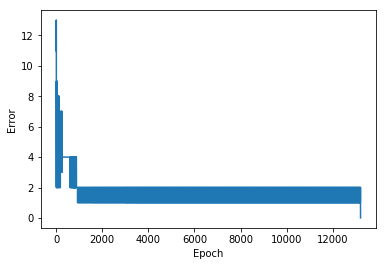

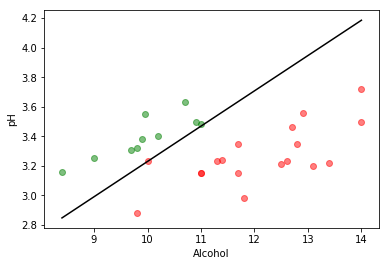

In [57]:
plot_perfomance(train_info, wine_data, [7,4])

In [58]:
def plot_perfomance_normalize(perfomance, wine_data, good_thresh, epoch= -1, save_plot = False):
    selected_wine_d = wine_data[(wine_data['quality'] > good_thresh[0]) | (wine_data['quality'] < good_thresh[1])][features]
    data_alcohol = normalize(selected_wine_d['alcohol'])
    data_ph = normalize(selected_wine_d['pH'])
    array_quality = selected_wine_d['quality']
    array_values = normalize_quality(array_quality, data_alcohol, data_ph)
    x_epoch = [x[0] for x in train_info]
    y_error = [x[2] for x in train_info]
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.plot(x_epoch,y_error)
    plt.show()
    if save_plot:
        plt.savefig('./scatterplotError.png')
    epoch_w = perfomance[-1][3] if epoch == -1 else perfomance[epoch - 1][3]
    list_of_wines = select_data(array_values, epoch_w , selected_wine_d)
    plot_points(list_of_wines, epoch_w , 0 , 1.1)
    if save_plot:
        plt.savefig('./DesicionBoundary.png')

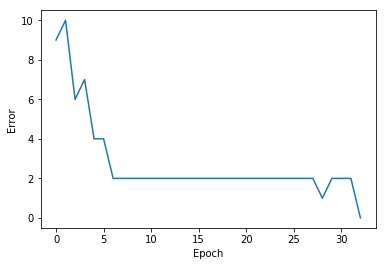

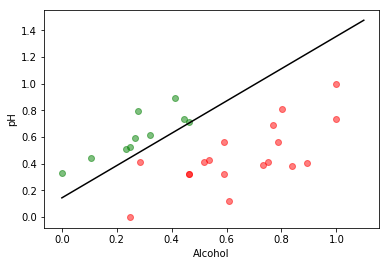

In [59]:
plot_perfomance_normalize(train_info, wine_data, [7,4])

# V.3 My fair Adaline

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import random
from math import ceil, floor

In [61]:
red_wine_data = pd.read_csv("resources/winequality-red.csv", sep=';')
def col_min_max(col):
    """calculates the min and max value"""
    min_value = col.iloc[0]
    max_value = col.iloc[0]
    for x in col:
        if x > max_value:
            max_value = x
        if x < min_value:
            min_value = x
    return min_value, max_value

def normalizing(data):
    """rescale data values to the range between 0 and 1"""
    for j in range(data.shape[1]):
        min_value, max_value = col_min_max(data.iloc[:, j])
        for i in range(len(data)):
            data.iloc[i, j] = (data.iloc[i, j] - min_value) / (max_value - min_value)
    return data

In [62]:
def accuracy_score(weight_values, data):
    right_answers = 0
    for i in range(len(data)):
        prediction = quantizer(data.iloc[i, :], weight_values)
        if prediction == data.iat[i, -1]:
            right_answers += 1
    return right_answers / len(data)


def activation_calc(row, weights):
    activation = weights[0]
    for i in range(len(weights) - 1):
        activation += weights[i + 1] * row[i]
    return activation


def shuffle_data(data):
    index_list = [i for i in range(len(data))]
    random.shuffle(index_list)
    data = data.iloc[index_list, :]
    data.reset_index(inplace=True, drop=True)
    return data


def quantizer(row, classifier_weights):
    activation = activation_calc(row, classifier_weights)
    return 1 if activation >= 0 else -1


def adaline_train(l_rate, data, n_epochs, mode='online'):
    """function that trains adaline's weights"""
    performance = []
#     random.seed(100)
    weights = [random.uniform(-1, 1) for i in range(len(data.columns))]
    if mode == 'batch':
        epoch = 0
        while True:
            data = shuffle_data(data)
            product_x_e = [0 for i in range(len(weights))]
            sum_error = 0.0
            for i in range(len(data)):
                activation = activation_calc(data.iloc[i, :], weights)
                error = activation - data.iat[i, -1]
                sum_error += error ** 2
                product_x_e[0] += error
                for j in range(len(data.columns) - 1):
                    product_x_e[j + 1] += error * data.iat[i, j]
            for k in range(len(weights)):
                weights[k] -= ((2 * l_rate) / len(data)) * product_x_e[k]
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            if n_epochs == 0 and epoch >= 500 and abs(sum_error - performance[-150][1]) < 0.001 * sum_error:
                break
            if n_epochs != 0 and epoch == n_epochs:
                break
            epoch += 1

    elif mode == 'online':
        epoch = 0
        while True:
            sum_error = 0.0
            data = shuffle_data(data)
            for i in range(len(data)):
                activation = activation_calc(data.iloc[i, :], weights)
                error = activation - data.iat[i, -1]
                sum_error += error ** 2
                weights[0] = weights[0] - (2 * l_rate * error)
                for j in range(len(data.columns) - 1):
                    weights[j + 1] = weights[j + 1] - (2 * l_rate * error * data.iat[i, j])
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            if n_epochs == 0 and epoch >= 200 and abs(sum_error - performance[-50][1]) < 0.005 * sum_error:
                break
            if n_epochs != 0 and epoch == n_epochs:
                break
            epoch += 1

    return performance

def adaline_plot(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    fig = plt.figure("Performance", figsize=(12, 6))

    plt.subplot(121)

    y = [epoch[1] for epoch in performance]
    x = range(len(performance))

    plt.plot(x, y, color='blue')
#     plt.fill_between(x, 0, y, facecolor='blue')
    plt.xlabel('epoch')
    plt.ylabel('classification errors')
    plt.title('Errors as function of epoch')

    plt.subplot(122)
    x_good, y_good = wine_data.loc[wine_data['quality'] >= good_thresh][wine_data.columns[0]], \
                     wine_data.loc[wine_data['quality'] >= good_thresh][wine_data.columns[1]]
    x_bad, y_bad = wine_data.loc[wine_data['quality'] <= bad_thresh][wine_data.columns[0]], \
                   wine_data.loc[wine_data['quality'] <= bad_thresh][wine_data.columns[1]]
    plt.scatter(x_good, y_good, color='green', s=10)
    plt.scatter(x_bad, y_bad, color='magenta', s=10)

    output_epoch = performance[-1] if epoch == -1 else performance[epoch]

    weights = [output_epoch[-1]]
    weights.extend(output_epoch[2])

    min_x = min(min(x_good), min(x_bad))
    max_x = max(max(x_good), max(x_bad))
    min_y = min(min(y_good), min(y_bad))
    max_y = max(max(y_good), max(y_bad))
    x_line = [i for i in range(floor(min_x) - 1, ceil(max_x) + 2)]
    y_line = [(-1) * (weights[0] + weights[1] * x) / weights[2] for x in x_line]
    plt.plot(x_line, y_line, linestyle='dashed', color='blue', alpha=0.7)
    under_line_class = quantizer([x_line[len(x_line) // 2], y_line[len(x_line) // 2] - 0.5], weights)
    if under_line_class == -1:
        plt.fill_between(x_line, min_y - 0.1, y_line, facecolor='magenta', alpha=0.3)
        plt.fill_between(x_line, max_y + 0.1, y_line, facecolor='green', alpha=0.2)
    else:
        plt.fill_between(x_line, min_y - 0.1, y_line, facecolor='green', alpha=0.2)
        plt.fill_between(x_line, max_y + 0.1, y_line, facecolor='magenta', alpha=0.3)

    plt.xlabel(wine_data.columns[0])
    plt.ylabel(wine_data.columns[1])
    plt.title('Decision boundary on epoch: ' + str(output_epoch[0]))
    plt.legend(['Decision Boundary', 'good wines (>' + str(good_thresh - 1) + ' score)',
                'bad wines (<' + str(bad_thresh + 1) + ' score)'],
               loc=2, bbox_to_anchor=(1.02, 0.98), borderaxespad=0.0)
    plt.xlim(min_x - min_x * 0.05, max_x + max_x * 0.05)
    plt.ylim(min_y - min_y * 0.05, max_y + max_y * 0.05)

    fig.tight_layout()
    plt.show()
    if save_plot:
        fig.savefig('plot_scatter_matrix.png', quality=90)

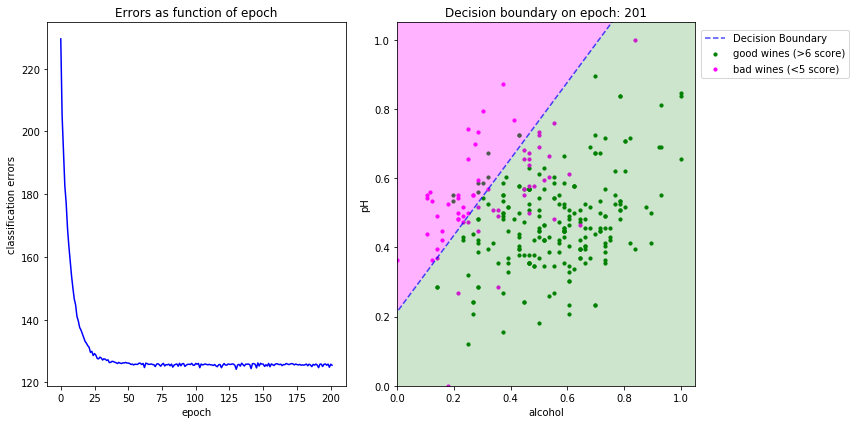

In [63]:
data = red_wine_data.loc[:, ['alcohol', 'pH', 'quality']].copy()
data = data.loc[(data['quality'] >= 7) | (data['quality'] <= 4)]
data['binary_quality'] = data['quality'].map({8: 1, 3: -1, 7: 1, 4: -1})

# scaling the data
data.iloc[:, :-2] = normalizing(data.iloc[:, :-2])

performance = adaline_train(0.005, data.iloc[:, [0, 1, 3]], 0, mode='online')
weights = performance[-1][-2][:]
weights.insert(0, performance[-1][-1])

adaline_plot(performance, data.iloc[:, 0:3], 7, 4)

accuracy = 0.8642857142857143


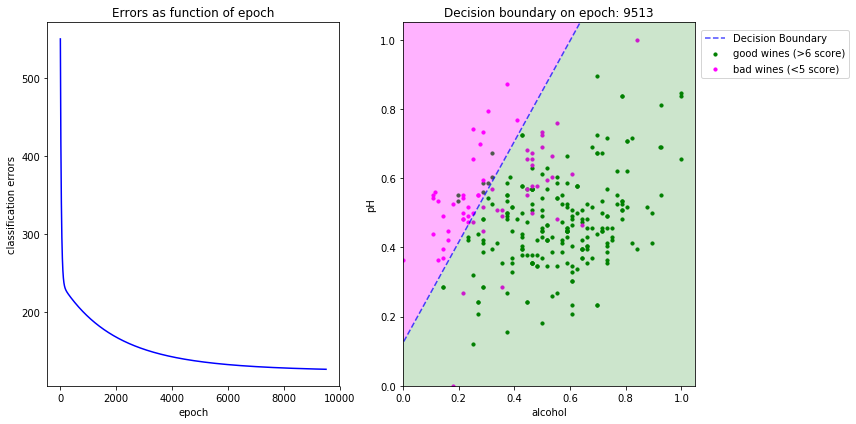

In [64]:
data = red_wine_data.loc[:, ['alcohol', 'pH', 'quality']].copy()
data = data.loc[(data['quality'] >= 7) | (data['quality'] <= 4)]
data['binary_quality'] = data['quality'].map({8: 1, 3: -1, 7: 1, 4: -1})

data.iloc[:, :-2] = normalizing(data.iloc[:, :-2])

performance = adaline_train(0.005, data.iloc[:, [0, 1, 3]], 0, mode='batch')
weights = performance[-1][-2][:]
weights.insert(0, performance[-1][-1])

print("accuracy = " + str(accuracy_score(weights, data)))
adaline_plot(performance, data.iloc[:, 0:3], 7, 4)

# V.4 Advanced wine sampling and resampling

In [65]:
def train_test_split(data, train_ratio=0.8):
    index_list = [i for i in range(len(data))]
    training_pandas_dataframe = data.iloc[index_list[0: floor(len(data) * train_ratio)], :].copy()
    validation_pandas_dataframe = data.iloc[index_list[floor(len(data) * train_ratio):], :].copy()
    training_pandas_dataframe.reset_index(inplace= True, drop= True)
    validation_pandas_dataframe.reset_index(inplace= True, drop= True)
    return training_pandas_dataframe, validation_pandas_dataframe

In [66]:
train_data, test_data = train_test_split(data)
perfomance = adaline_train(0.01, train_data.iloc[:, [0, 1, 3]], 0, mode= 'online')
weights = perfomance [-1][-2][:]
weights.insert(0, perfomance[-1][-1])

print("accuracy = " + str(accuracy_score(weights, test_data)))

accuracy = 0.7321428571428571


In [67]:
def k_fold_split(data, k, shuffle=False):
    if k < 2:
        return None
    if shuffle:
        index_list = [i for i in range(len(data))]
        random.shuffle(index_list)
        data = data.iloc[index_list, :]
        data.reset_index(inplace=True, drop=True)
    test_ratio = 1 / k
    result_list = []
    for i in range(k):
        training_pandas_dataframe = data.iloc[: i * floor(test_ratio * len(data)), :].copy().append(data.iloc[(i + 1)
                                                                                            * floor(test_ratio
                                                                                            * len(data)):, :].copy())
        cross_validation_pandas_dataframe = data.iloc[i * floor(test_ratio * len(data)):
                                                      (i + 1) * floor(test_ratio * len(data)), :].copy()
        training_pandas_dataframe.reset_index(inplace=True, drop=True)
        cross_validation_pandas_dataframe.reset_index(inplace=True, drop=True)
        result_list.append((training_pandas_dataframe, cross_validation_pandas_dataframe))
    return result_list

In [68]:
def cross_validation(data, training_function, method='online', n_folds=3, l_rate=0.01, n_epochs=1000):
    cross_validation_set = k_fold_split(data, n_folds, shuffle=True)
    overall_score = 0
    counter = 0
    for one_set in cross_validation_set:
        performance = training_function(l_rate, one_set[0], n_epochs, mode=method)
        weights = performance[-1][-2][:]
        weights.insert(0, performance[-1][-1])
        score = accuracy_score(weights, one_set[1])
        overall_score += score
        print("set" + str(counter) + "\t" + "-----> accuracy score: " + str(score))
        counter += 1
    return overall_score / n_folds

In [69]:
score = cross_validation(data.drop('quality', axis=1), adaline_train,
                         n_folds=3, n_epochs=0, method='online', l_rate=0.005)
print("score: " + str(score))

set0	-----> accuracy score: 0.7849462365591398
set1	-----> accuracy score: 0.8602150537634409
set2	-----> accuracy score: 0.8602150537634409
score: 0.8351254480286738


# V.5 Adventures in the Nth dimension

In [70]:
data = red_wine_data.loc[:, :].copy()
data = data.loc[(data['quality'] >= 7) | (data['quality'] <= 4)]
data['binary_quality'] = data['quality'].map({8: 1, 3: -1, 7: 1, 4: -1})

data.iloc[:, :-2] = normalizing(data.iloc[:, :-2])

score = cross_validation(data.loc[:, ['alcohol', 'sulphates', 'binary_quality']], adaline_train,
                         n_folds=10, n_epochs=0, method='online', l_rate=0.005)
print("score: " + str(score))

set0	-----> accuracy score: 0.9285714285714286
set1	-----> accuracy score: 0.8928571428571429
set2	-----> accuracy score: 0.8571428571428571
set3	-----> accuracy score: 0.7857142857142857
set4	-----> accuracy score: 0.9285714285714286
set5	-----> accuracy score: 0.8571428571428571
set6	-----> accuracy score: 0.8214285714285714
set7	-----> accuracy score: 0.8571428571428571
set8	-----> accuracy score: 0.9285714285714286
set9	-----> accuracy score: 0.8928571428571429
score: 0.875


In [71]:
score = cross_validation(data.loc[:, ['alcohol', 'sulphates', 'pH', 'binary_quality']], adaline_train,
                         n_folds=10, n_epochs=0, method='online', l_rate=0.005)
print("score: " + str(score))

set0	-----> accuracy score: 0.8928571428571429
set1	-----> accuracy score: 0.8928571428571429
set2	-----> accuracy score: 0.8571428571428571
set3	-----> accuracy score: 0.8928571428571429
set4	-----> accuracy score: 0.8571428571428571
set5	-----> accuracy score: 0.7857142857142857
set6	-----> accuracy score: 0.9285714285714286
set7	-----> accuracy score: 0.8214285714285714
set8	-----> accuracy score: 0.8928571428571429
set9	-----> accuracy score: 0.8571428571428571
score: 0.8678571428571429


In [72]:
score = cross_validation(data.loc[:, ['alcohol', 'sulphates', 'pH', 'citric acid',
                                      'volatile acidity', 'chlorides', 'binary_quality']],
                         adaline_train, n_folds=10, n_epochs=0, method='online', l_rate=0.005)
print("score: " + str(score))

set0	-----> accuracy score: 0.9285714285714286
set1	-----> accuracy score: 0.8571428571428571
set2	-----> accuracy score: 0.9642857142857143
set3	-----> accuracy score: 0.8571428571428571
set4	-----> accuracy score: 0.8571428571428571
set5	-----> accuracy score: 0.8928571428571429
set6	-----> accuracy score: 0.9642857142857143
set7	-----> accuracy score: 0.8928571428571429
set8	-----> accuracy score: 0.8928571428571429
set9	-----> accuracy score: 0.8571428571428571
score: 0.8964285714285716


In [73]:
score = cross_validation(data.drop('quality', axis=1), adaline_train,
                         n_folds=10, n_epochs=0, method='online', l_rate=0.005)
print("score: " + str(score))

set0	-----> accuracy score: 0.9642857142857143
set1	-----> accuracy score: 0.8928571428571429
set2	-----> accuracy score: 0.9285714285714286
set3	-----> accuracy score: 0.8928571428571429
set4	-----> accuracy score: 0.9285714285714286
set5	-----> accuracy score: 0.8928571428571429
set6	-----> accuracy score: 0.8571428571428571
set7	-----> accuracy score: 0.75
set8	-----> accuracy score: 0.9642857142857143
set9	-----> accuracy score: 0.9285714285714286
score: 0.9


# V.6  Marvin’s rebuttal

In [74]:
path = 'resources/Pan Galactic Gargle Blaster.csv'
data_galactic = pd.read_csv(path, sep= ';')

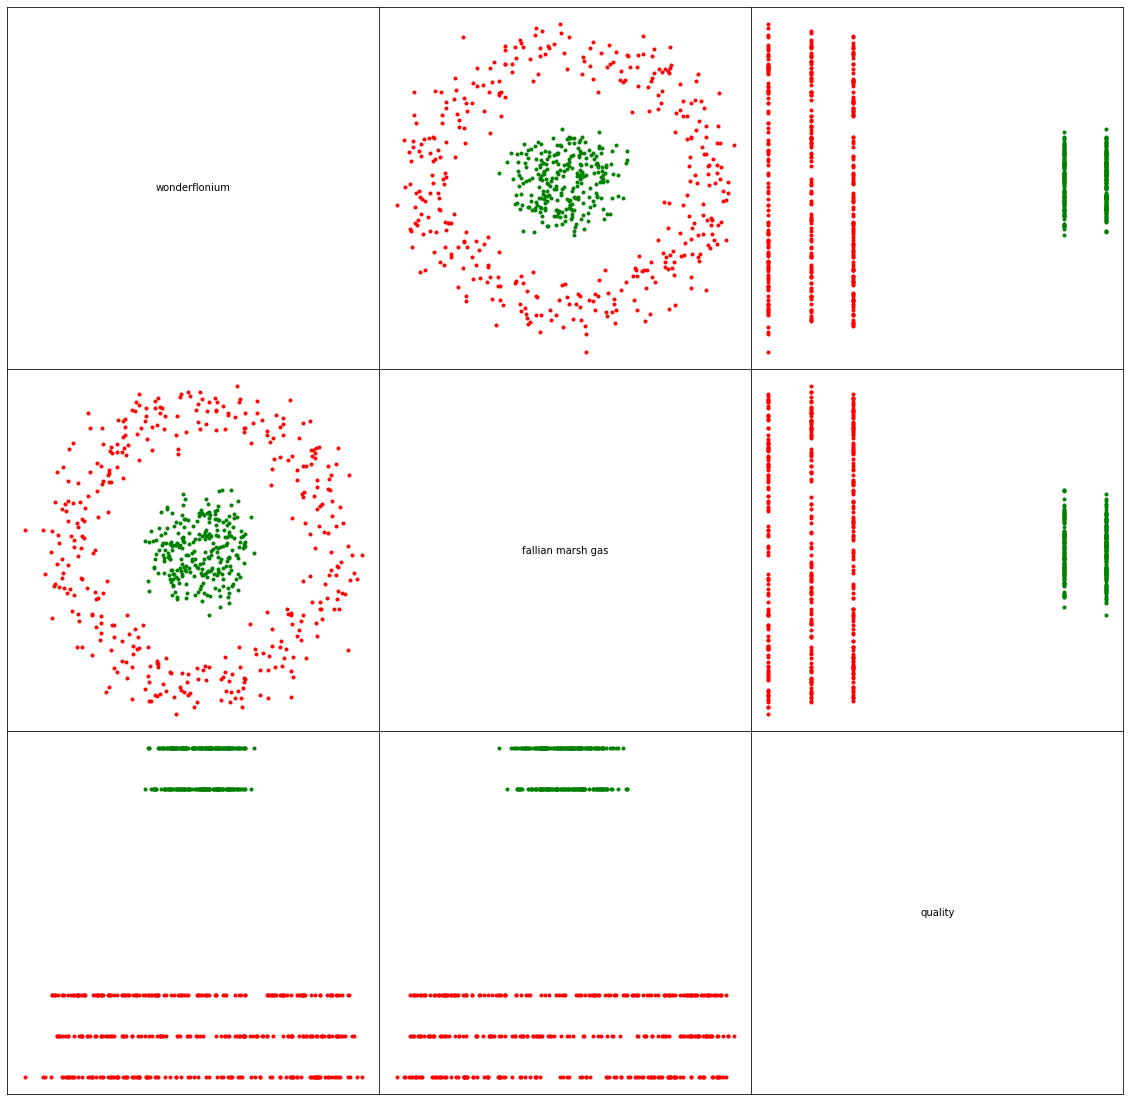

In [75]:
fig = plot_scatter_matrix(data_galactic, 7, 4, True)
plt.show(fig)

In [76]:
data_galactic['radius'] = 0.0
data_galactic['theta'] = 0.0
cols = data_galactic.columns.tolist()
cols = cols[:2] + cols[-2:] + cols[2:3]
data_galactic = data_galactic[cols]
bad_blasters = data_galactic.loc[data_galactic['quality'] <= 2]
new_x_0 = bad_blasters.iloc[:, 0].mean()
new_y_0 = bad_blasters.iloc[:, 1].mean()
for i in range(data_galactic.shape[0]):
    data_galactic.iat[i, 2] = math.sqrt((data_galactic.iat[i, 0] - new_x_0) ** 2 + (data_galactic.iat[i, 1] - new_y_0) ** 2)
    data_galactic.iat[i, 3] = math.atan(data_galactic.iat[i, 1] / data_galactic.iat[i, 0])

In [77]:
data_galactic = data_galactic.loc[(data_galactic['quality'] >= 8) | (data_galactic['quality'] <= 2)]
data_galactic['binary_quality'] = data_galactic['quality'].map({8: 1, 2: -1, 9: 1, 1: -1})

data_galactic.drop(data_galactic.columns[:2], axis=1, inplace=True)
data_galactic.iloc[:, :2] = normalizing(data_galactic.iloc[:, :2])

score = 1.0


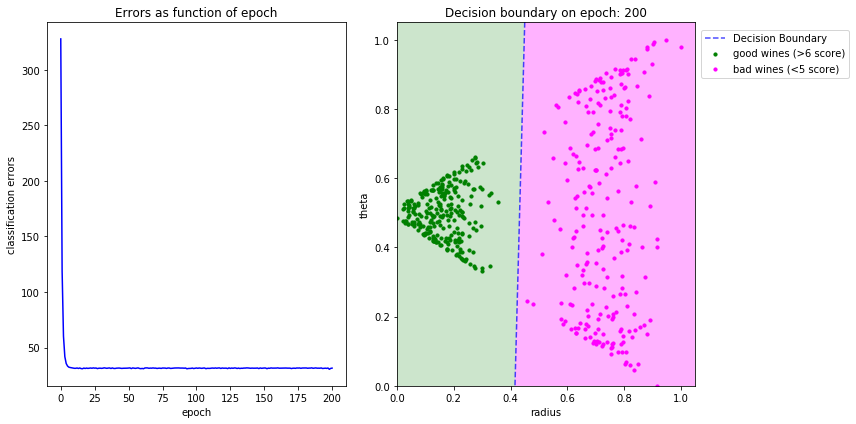

In [78]:
import math


data = pd.read_csv("resources/Pan Galactic Gargle Blaster.csv", sep=';')
data['radius'] = 0.0
data['theta'] = 0.0
cols = data.columns.tolist()
cols = cols[:2] + cols[-2:] + cols[2:3]
data = data[cols]
bad_blasters = data.loc[data['quality'] <= 2]
new_x_0 = bad_blasters.iloc[:, 0].mean()
new_y_0 = bad_blasters.iloc[:, 1].mean()
for i in range(data.shape[0]):
    data.iat[i, 2] = math.sqrt((data.iat[i, 0] - new_x_0) ** 2 + (data.iat[i, 1] - new_y_0) ** 2)
    data.iat[i, 3] = math.atan(data.iat[i, 1] / data.iat[i, 0])

data = data.loc[(data['quality'] >= 8) | (data['quality'] <= 2)]
data['binary_quality'] = data['quality'].map({8: 1, 2: -1, 9: 1, 1: -1})

data.drop(data.columns[:2], axis=1, inplace=True)
data.iloc[:, :2] = normalizing(data.iloc[:, :2])


train_data, test_data = train_test_split(data)
performance = adaline_train(0.01, train_data.iloc[:, [0, 1, 3]], 200, mode='online')
last_weights = [performance[-1][-1]]
last_weights.extend(performance[-1][-2])
print("score = " + str(accuracy_score(last_weights, test_data)))
adaline_plot(performance, data.iloc[:, 0:3], 7, 4)